In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
path = 'D:\Github Files\Laptop price\data\laptop_data.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.shape

(1303, 12)

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
data = data.drop(columns='Unnamed: 0')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df = data.copy()

In [10]:
df['Weight']=df['Weight'].str.replace('kg','')
df['Ram']=df['Ram'].str.replace('GB','')

#### EDA, Data Cleaning and Feature Engineering

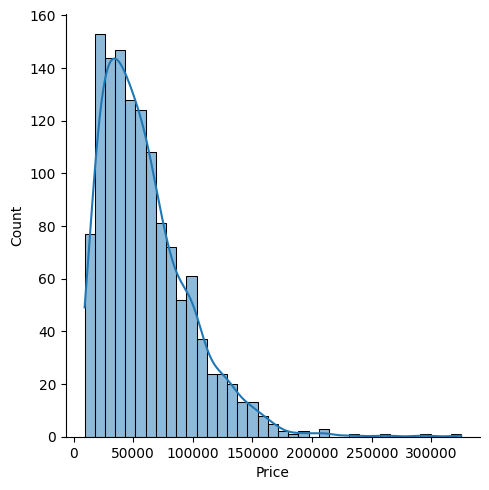

In [11]:
sns.displot(df['Price'], kde=True)

<Axes: xlabel='Company'>

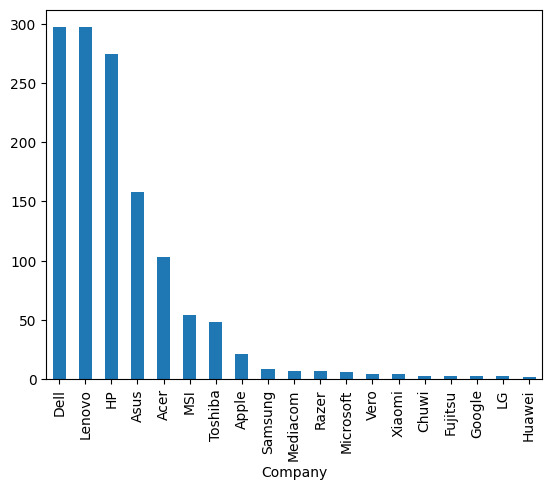

In [12]:
df['Company'].value_counts().plot(kind='bar')

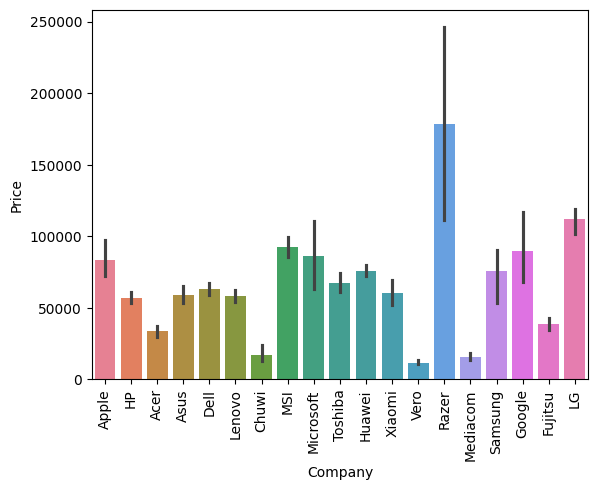

In [13]:
# df['Price'].groupby(df['Company']).mean()
sns.barplot(data=df, x='Company', y='Price', hue='Company')
plt.xticks(rotation=90)
plt.show()

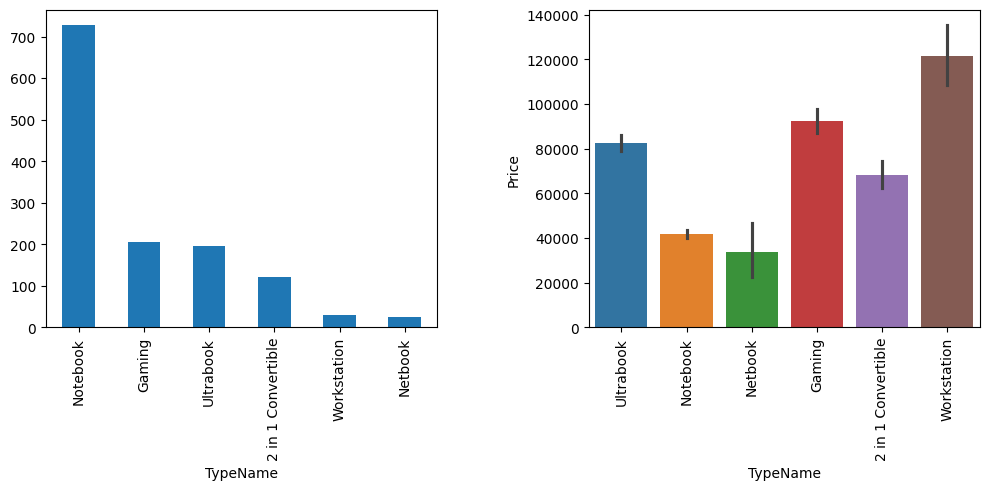

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
df['TypeName'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
sns.barplot(data=df, x = 'TypeName', y='Price', hue = 'TypeName')
plt.xticks(rotation=90)

plt.tight_layout(w_pad=5)
plt.show()

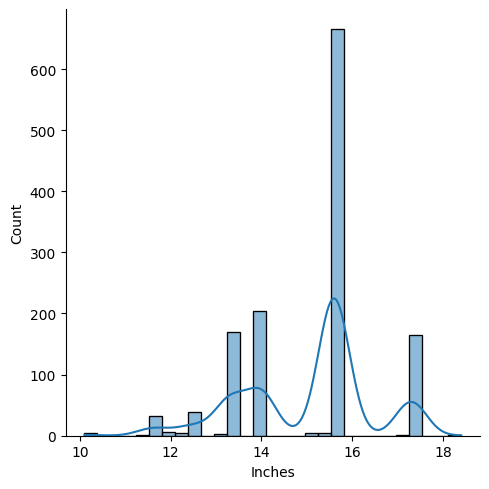

In [15]:
sns.displot(df['Inches'], kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

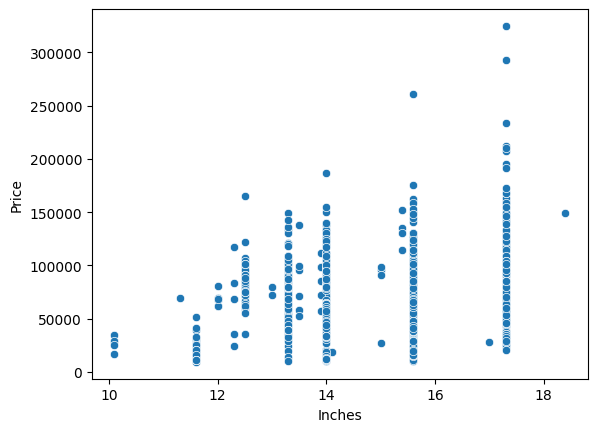

In [16]:
sns.scatterplot(data=df, x='Inches', y='Price')

In [17]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [18]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

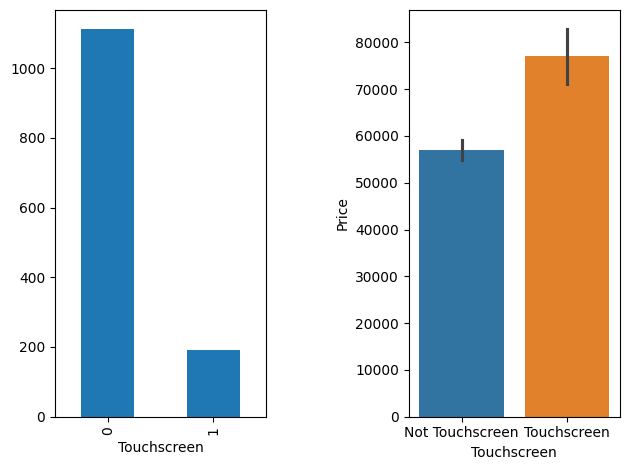

In [36]:
plt.subplot(1,2,1)
df['Touchscreen'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
sns.barplot(data=df, x ='Touchscreen', y ='Price', hue = 'Touchscreen', legend=None)
plt.xticks([0,1],['Not Touchscreen', 'Touchscreen'])
plt.tight_layout(w_pad=5)
plt.show()

In [32]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

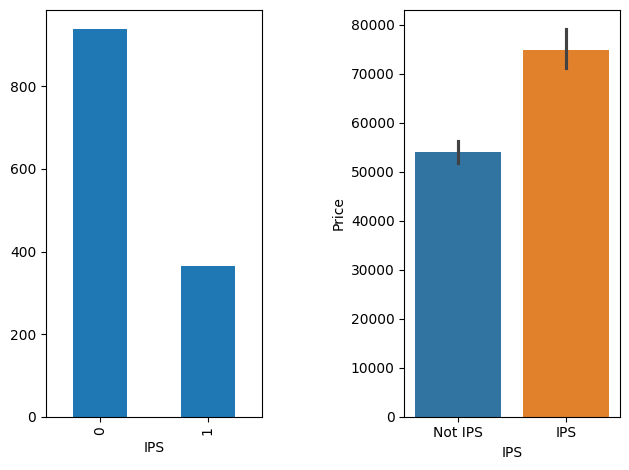

In [37]:
plt.subplot(1,2,1)
df['IPS'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
sns.barplot(data=df, x ='IPS', y ='Price', hue = 'IPS', legend=None)
plt.xticks([0,1],['Not IPS', 'IPS'])
plt.tight_layout(w_pad=5)
plt.show()

In [55]:
new = df['ScreenResolution'].str.split('x',n=1, expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')


# df['ResolutionNumber'] = df['ScreenResolution'].str.extract('(\d+)', expand=False) - This pulls the first number it finds
# df['AllNumbers'] = df['ScreenResolution'].str.findall(r'\d+')

In [59]:
df['PPI']=(((df['X_res']**2) + (df['Y_res'] **2))**0.5/df['Inches']).astype('float')

In [62]:
df = df.drop(columns=['Inches','X_res','Y_res'])

In [64]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [75]:
df['Cpu_new'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [84]:
df['Cpu_new'].value_counts()

Cpu_new
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  1


In [85]:
def fetch_processor(txt):
    if txt == 'Intel Core i7' or txt == 'Intel Core i5' or txt == 'Intel Core i3':
        return txt 
    else: 
        if txt.split()[0] == 'Intel': 
            return 'Other Inter Processor'
        else :
            return 'AMD Processor'

In [86]:
df['Cpu_brand'] = df['Cpu_new'].apply(fetch_processor) 

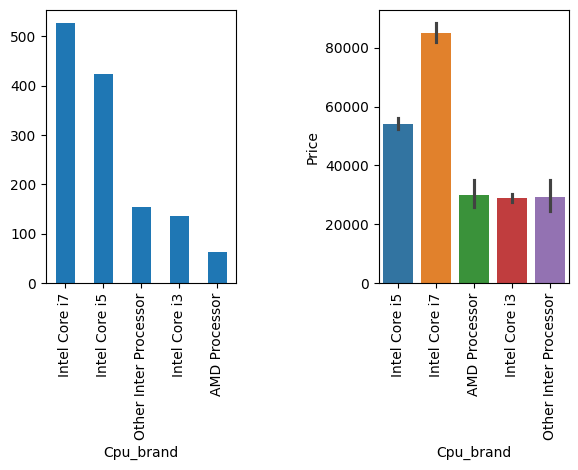

In [91]:
plt.subplot(1,2,1)
df['Cpu_brand'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
sns.barplot(data=df, x ='Cpu_brand', y ='Price', hue = 'Cpu_brand', legend=None)
plt.tight_layout(w_pad=5)
plt.xticks(rotation=90)
plt.show()

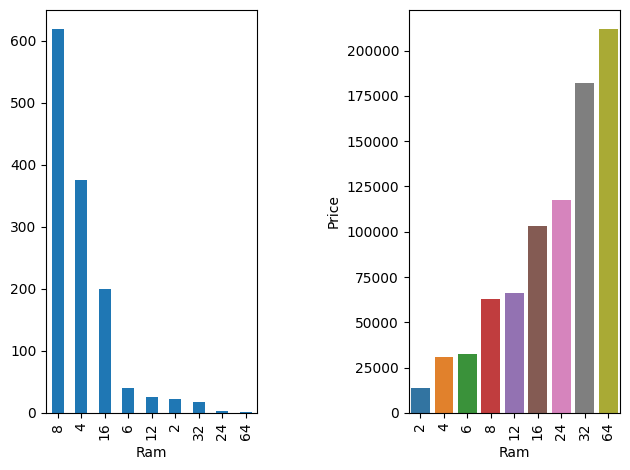

In [104]:
plt.subplot(1,2,1)
df['Ram'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
sort = df.groupby(df['Ram'],)['Price'].mean().sort_values(ascending=True).reset_index()
sns.barplot(data=sort, x ='Ram', y ='Price', hue = 'Ram',dodge=False)
plt.tight_layout(w_pad=5)
plt.xticks(rotation=90)
plt.show()

Ram
2      13552.857818
4      30613.221734
6      32778.193873
8      62913.713455
12     66037.277952
16    103191.166872
24    117553.440000
32    181849.215812
64    211788.000000
Name: Price, dtype: float64

In [119]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

OpSys
windows    1125
Others      157
macOS        21
Name: count, dtype: int64

In [122]:
df.sample(10)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_new,Cpu_brand
470,HP,2 in 1 Convertible,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.7200,1,1,331.264236,Intel Core i7,Intel Core i7
581,Dell,Notebook,1366x768,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.9,53733.9456,0,0,100.454670,Intel Core i5,Intel Core i5
778,Razer,Gaming,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.7200,0,0,157.350512,Intel Core i7,Intel Core i7
623,Fujitsu,Notebook,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.2,42570.7200,0,0,100.454670,Intel Core i5,Intel Core i5
1166,Lenovo,Notebook,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,74059.2000,0,1,141.211998,Intel Core i5,Intel Core i5
882,Asus,Notebook,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65,18541.4400,0,0,111.141337,Intel Celeron Dual,Other Inter Processor
988,Dell,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.7200,0,0,100.454670,Intel Core i7,Intel Core i7
1099,Asus,Gaming,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.3,122490.7200,0,1,127.335675,Intel Core i7,Intel Core i7
244,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.1200,1,1,158.482530,Intel Core i7,Intel Core i7
1267,Dell,Notebook,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.3,42943.1472,0,0,100.454670,Intel Core i7,Intel Core i7
